In [147]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split# We plot a histogram of a variable with 100 bins.
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [104]:
# Import data.
loan_data_defaults = pd.read_csv('loan_data_defaults.csv')

/var/folders/2h/rjm2fb_j53gb0nswwgx_xyfc0000gn/T/ipykernel_94777/1972329785.py:2: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data_defaults = pd.read_csv('loan_data_defaults.csv')


In [105]:
current_date = pd.to_datetime('2017-12-01')
loan_data_defaults['issue_d_dates'] = pd.to_datetime(loan_data_defaults['issue_d'], format = '%b-%y')
loan_data_defaults = loan_data_defaults.rename(columns={'months_since_earliest_cr_line': 'mths_since_earliest_cr_line'})
loan_data_defaults['mths_since_issue_d'] = (current_date - loan_data_defaults['issue_d_dates']).apply(lambda x: x.days // 30)


In [106]:
# o means bad/default and 1 means good/non-default
loan_data_defaults['good_bad'] = np.where(
    loan_data_defaults['loan_status'].isin(
        ['Charged Off','Default','Late (31-120 days)','Does not meet the credit policy. Status:Charged Off']),
        0,1)

In [107]:
loan_data_defaults

,Unnamed: 0.1,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,...,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w,recovery_rate,CCF,recovery_rate_0_1,mths_since_issue_d,good_bad
0,1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,...,False,False,False,True,False,0.046832,0.817416,1,73,0
1,8,8,1071795,1306957,5600,5600,5600.0,60 months,21.28,152.39,...,False,False,False,True,False,0.033761,0.971068,1,73,0
2,9,9,1071570,1306721,5375,5375,5350.0,60 months,12.69,121.45,...,False,False,False,True,False,0.050100,0.874701,1,73,0
3,12,12,1064687,1298717,9000,9000,9000.0,36 months,13.49,305.38,...,False,False,False,True,False,0.049367,0.860429,1,73,0
4,14,14,1069057,1303503,10000,10000,10000.0,36 months,10.65,325.74,...,False,False,False,True,False,0.064510,0.456653,1,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43231,466254,466254,9856168,11708132,6000,6000,6000.0,60 months,23.40,170.53,...,False,False,False,True,False,0.000000,0.972715,0,47,0
43232,466256,466256,9835883,9309502,15000,15000,15000.0,36 months,16.99,534.72,...,False,False,False,True,False,0.000000,0.770886,0,47,0
43233,466276,466276,9695736,11547808,8525,8525,8525.0,60 months,18.25,217.65,...,False,False,False,True,False,0.136000,0.957762,1,47,0
43234,466277,466277,9007579,10799568,18000,18000,17975.0,36 months,7.90,563.23,...,False,False,False,True,False,0.000000,0.745506,0,47,0


In [108]:
# LGD model stage 1 datasets: recovery rate 0 or greater than 0.
lgd_inputs_stage_1_train, lgd_inputs_stage_1_test, lgd_targets_stage_1_train, lgd_targets_stage_1_test = train_test_split(loan_data_defaults.drop(['good_bad', 'recovery_rate','recovery_rate_0_1', 'CCF'], axis = 1), loan_data_defaults['recovery_rate_0_1'], test_size = 0.2, random_state = 42)
# Takes a set of inputs and a set of targets as arguments. Splits the inputs and the targets into four dataframes:
# Inputs - Train, Inputs - Test, Targets - Train, Targets - Test.

# LGD Model

In [109]:
features_all = ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:MORTGAGE',
'home_ownership:NONE',
'home_ownership:OTHER',
'home_ownership:OWN',
'home_ownership:RENT',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:car',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:educational',
'purpose:home_improvement',
'purpose:house',
'purpose:major_purchase',
'purpose:medical',
'purpose:moving',
'purpose:other',
'purpose:renewable_energy',
'purpose:small_business',
'purpose:vacation',
'purpose:wedding',
'initial_list_status:f',
'initial_list_status:w',
'term_int',
'emp_length_int',
'mths_since_issue_d',
'mths_since_earliest_cr_line',
'funded_amnt',
'int_rate',
'installment',
'annual_inc',
'dti',
'delinq_2yrs',
'inq_last_6mths',
'mths_since_last_delinq',
'mths_since_last_record',
'open_acc',
'pub_rec',
'total_acc',
'acc_now_delinq',
'total_rev_hi_lim']
# List of all independent variables for the models.

In [110]:
features_reference_cat = ['grade:G',
'home_ownership:RENT',
'verification_status:Verified',
'purpose:credit_card',
'initial_list_status:f']
# List of the dummy variable reference categories. 

In [111]:
lgd_inputs_stage_1_train = lgd_inputs_stage_1_train[features_all]
# Here we keep only the variables we need for the model.

In [112]:
lgd_inputs_stage_1_train = lgd_inputs_stage_1_train.drop(features_reference_cat, axis = 1)
# Here we remove the dummy variable reference categories.

In [113]:
lgd_inputs_stage_1_train.isnull().sum()
# Check for missing values. We check whether the value of each row for each column is missing or not,
# then sum accross columns.

grade:A                                0
grade:B                                0
grade:C                                0
grade:D                                0
grade:E                                0
grade:F                                0
home_ownership:MORTGAGE                0
home_ownership:NONE                    0
home_ownership:OTHER                   0
home_ownership:OWN                     0
verification_status:Not Verified       0
verification_status:Source Verified    0
purpose:car                            0
purpose:debt_consolidation             0
purpose:educational                    0
purpose:home_improvement               0
purpose:house                          0
purpose:major_purchase                 0
purpose:medical                        0
purpose:moving                         0
purpose:other                          0
purpose:renewable_energy               0
purpose:small_business                 0
purpose:vacation                       0
purpose:wedding 

# Estimating the Model

In [114]:
# P values for sklearn logistic regression.

# Class to display p-values for logistic regression in sklearn.

from sklearn import linear_model
import scipy.stats as stat

# Class to display p-values for logistic regression in sklearn.
class LogisticRegression_with_p_values:
    def __init__(self, *args, **kwargs):
        self.model = linear_model.LogisticRegression(*args, **kwargs)

    def fit(self, X, y):
        self.model.fit(X, y)

        #### Get p-values for the fitted model ####
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom, (X.shape[1], 1)).T
        F_ij = np.dot((X / denom).T, X)  # Fisher Information Matrix
        Cramer_Rao = np.linalg.inv(F_ij)  # Inverse Information Matrix
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates  # z-score for each model coefficient
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores]  # two-tailed test for p-values

        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [115]:
lgd_targets_stage_1_train.shape

(34588,)

In [116]:
lgd_inputs_stage_1_train =lgd_inputs_stage_1_train.astype(float)


In [118]:
lgd_inputs_stage_1_train

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,...,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,total_acc,acc_now_delinq,total_rev_hi_lim
19698,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,26.31,0.0,2.0,0.0,0.0,17.0,0.0,34.0,0.0,13700.0
26556,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,27.21,0.0,3.0,0.0,0.0,11.0,0.0,13.0,0.0,3000.0
21857,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20.33,0.0,1.0,0.0,0.0,7.0,0.0,38.0,0.0,14600.0
9905,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,17.31,0.0,0.0,0.0,68.0,12.0,2.0,30.0,0.0,5800.0
9205,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,24.28,0.0,0.0,72.0,0.0,13.0,0.0,35.0,0.0,15900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.00,0.0,8.0,61.0,85.0,7.0,1.0,13.0,0.0,10000.0
11284,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,8.87,0.0,0.0,0.0,0.0,10.0,0.0,20.0,0.0,39500.0
38158,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,13.20,1.0,0.0,14.0,0.0,14.0,0.0,22.0,0.0,59300.0
860,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.32,0.0,1.0,0.0,0.0,6.0,0.0,11.0,0.0,5000.0


In [117]:
reg_lgd_st_1 = LogisticRegression_with_p_values()
# We create an instance of an object from the 'LogisticRegression' class.
reg_lgd_st_1.fit(lgd_inputs_stage_1_train, lgd_targets_stage_1_train)
# Estimates the coefficients of the object from the 'LogisticRegression' class
# with inputs (independent variables) contained in the first dataframe
# and targets (dependent variables) contained in the second dataframe.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [120]:
feature_name = lgd_inputs_stage_1_train.columns.values
# Stores the names of the columns of a dataframe in a variable.

In [121]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
# Creates a dataframe with a column titled 'Feature name' and row values contained in the 'feature_name' variable.
summary_table['Coefficients'] = np.transpose(reg_lgd_st_1.coef_)
# Creates a new column in the dataframe, called 'Coefficients',
# with row values the transposed coefficients from the 'LogisticRegression' object.
summary_table.index = summary_table.index + 1
# Increases the index of every row of the dataframe with 1.
summary_table.loc[0] = ['Intercept', reg_lgd_st_1.intercept_[0]]
# Assigns values of the row with index 0 of the dataframe.
summary_table = summary_table.sort_index()
# Sorts the dataframe by index.
p_values = reg_lgd_st_1.p_values
# We take the result of the newly added method 'p_values' and store it in a variable 'p_values'.
p_values = np.append(np.nan,np.array(p_values))
# We add the value 'NaN' in the beginning of the variable with p-values.
summary_table['p_values'] = p_values
# In the 'summary_table' dataframe, we add a new column, called 'p_values', containing the values from the 'p_values' variable.
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.990301e-06,NaN
1,grade:A,-7.729568e-07,9.999928e-01
2,grade:B,-3.228137e-05,9.996264e-01
3,grade:C,-8.634528e-05,9.989637e-01
4,grade:D,3.007162e-05,9.996529e-01
5,grade:E,1.646416e-05,9.998276e-01
6,grade:F,6.089484e-05,9.994447e-01
7,home_ownership:MORTGAGE,-2.680574e-05,9.991615e-01
8,home_ownership:NONE,7.433274e-07,9.999993e-01
9,home_ownership:OTHER,1.004251e-06,9.999980e-01


In [122]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg_lgd_st_1.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg_lgd_st_1.intercept_[0]]
summary_table = summary_table.sort_index()
p_values = reg_lgd_st_1.p_values
p_values = np.append(np.nan,np.array(p_values))
summary_table['p_values'] = p_values
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.990301e-06,NaN
1,grade:A,-7.729568e-07,9.999928e-01
2,grade:B,-3.228137e-05,9.996264e-01
3,grade:C,-8.634528e-05,9.989637e-01
4,grade:D,3.007162e-05,9.996529e-01
5,grade:E,1.646416e-05,9.998276e-01
6,grade:F,6.089484e-05,9.994447e-01
7,home_ownership:MORTGAGE,-2.680574e-05,9.991615e-01
8,home_ownership:NONE,7.433274e-07,9.999993e-01
9,home_ownership:OTHER,1.004251e-06,9.999980e-01


# Testing the Model

In [123]:
lgd_inputs_stage_1_test = lgd_inputs_stage_1_test[features_all]
# Here we keep only the variables we need for the model.

In [124]:
lgd_inputs_stage_1_test = lgd_inputs_stage_1_test.drop(features_reference_cat, axis = 1)
# Here we remove the dummy variable reference categories.

In [125]:
y_hat_test_lgd_stage_1 = reg_lgd_st_1.model.predict(lgd_inputs_stage_1_test)
# Calculates the predicted values for the dependent variable (targets)
# based on the values of the independent variables (inputs) supplied as an argument.

In [126]:
y_hat_test_lgd_stage_1

array([1, 1, 0, ..., 0, 1, 1])

In [127]:
y_hat_test_proba_lgd_stage_1 = reg_lgd_st_1.model.predict_proba(lgd_inputs_stage_1_test)


In [128]:
y_hat_test_proba_lgd_stage_1


array([[0.38975531, 0.61024469],
       [0.39755923, 0.60244077],
       [0.56996938, 0.43003062],
       ...,
       [0.58717844, 0.41282156],
       [0.39126421, 0.60873579],
       [0.44136928, 0.55863072]])

In [129]:
y_hat_test_proba_lgd_stage_1 = y_hat_test_proba_lgd_stage_1[: ][: , 1]


In [130]:
y_hat_test_proba_lgd_stage_1

array([0.61024469, 0.60244077, 0.43003062, ..., 0.41282156, 0.60873579,
       0.55863072])

In [131]:
lgd_targets_stage_1_test_temp = lgd_targets_stage_1_test

In [132]:
lgd_targets_stage_1_test_temp.reset_index(drop = True, inplace = True)


In [133]:
df_actual_predicted_probs = pd.concat([lgd_targets_stage_1_test_temp, pd.DataFrame(y_hat_test_proba_lgd_stage_1)], axis = 1)


In [134]:
df_actual_predicted_probs.columns = ['lgd_targets_stage_1_test', 'y_hat_test_proba_lgd_stage_1']

In [135]:
df_actual_predicted_probs.index = lgd_inputs_stage_1_test.index


In [136]:
df_actual_predicted_probs.head()

,lgd_targets_stage_1_test,y_hat_test_proba_lgd_stage_1
21362,1,0.610245
8768,1,0.602441
11903,0,0.430031
42973,1,0.512714
29933,0,0.423505


# Estimating the Аccuracy of the Мodel

In [138]:
tr = 0.5
# We create a new column with an indicator,
# where every observation that has predicted probability greater than the threshold has a value of 1,
# and every observation that has predicted probability lower than the threshold has a value of 0.
df_actual_predicted_probs['y_hat_test_lgd_stage_1'] = np.where(df_actual_predicted_probs['y_hat_test_proba_lgd_stage_1'] > tr, 1, 0)

In [139]:
pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage_1'], rownames = ['Actual'], colnames = ['Predicted'])
# Creates a cross-table where the actual values are displayed by rows and the predicted values by columns.
# This table is known as a Confusion Matrix.

Predicted,0,1
Actual,,
0,1098,2664
1,809,4077


In [140]:
pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage_1'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]
# Here we divide each value of the table by the total number of observations,
# thus getting percentages, or, rates.

Predicted,0,1
Actual,,
0,0.126966,0.308048
1,0.093548,0.471438


In [141]:
(pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage_1'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage_1'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]
# Here we calculate Accuracy of the model, which is the sum of the diagonal rates.

0.598404255319149

In [142]:
from sklearn.metrics import roc_curve, roc_auc_score

In [143]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_proba_lgd_stage_1'])


Text(0.5, 1.0, 'ROC curve')

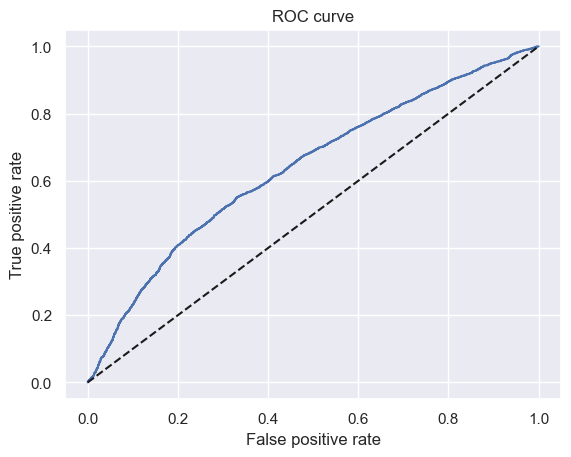

In [149]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

In [150]:
AUROC = roc_auc_score(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_proba_lgd_stage_1'])
# Calculates the Area Under the Receiver Operating Characteristic Curve (AUROC)
# from a set of actual values and their predicted probabilities.
AUROC

0.6387442840843536

In [151]:
import pickle

In [152]:
pickle.dump(reg_lgd_st_1, open('lgd_model_stage_1.sav', 'wb'))
# wb = write bytes

# Stage 2 – Linear Regression

In [153]:
lgd_stage_2_data = loan_data_defaults[loan_data_defaults['recovery_rate_0_1'] == 1]


In [154]:
lgd_inputs_stage_2_train, lgd_inputs_stage_2_test, lgd_targets_stage_2_train, lgd_targets_stage_2_test = train_test_split(lgd_stage_2_data.drop(['good_bad', 'recovery_rate','recovery_rate_0_1', 'CCF'], axis = 1), lgd_stage_2_data['recovery_rate'], test_size = 0.2, random_state = 42)


In [155]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [156]:
# Since the p-values are obtained through certain statistics, we need the 'stat' module from scipy.stats
import scipy.stats as stat

# Since we are using an object oriented language such as Python, we can simply define our own 
# LinearRegression class (the same one from sklearn)
# By typing the code below we will ovewrite a part of the class with one that includes p-values
# Here's the full source code of the ORIGINAL class: https://github.com/scikit-learn/scikit-learn/blob/7b136e9/sklearn/linear_model/base.py#L362


class LinearRegression(linear_model.LinearRegression):
    """
    LinearRegression class after sklearn's, but calculate t-statistics
    and p-values for model coefficients (betas).
    Additional attributes available after .fit()
    are `t` and `p` which are of the shape (y.shape[1], X.shape[1])
    which is (n_features, n_coefs)
    This class sets the intercept to 0 by default, since usually we include it
    in X.
    """
    
    # nothing changes in __init__
    def __init__(self, fit_intercept=True, normalize=False, copy_X=True,
                 n_jobs=1):
        self.fit_intercept = fit_intercept
        self.normalize = normalize
        self.copy_X = copy_X
        self.n_jobs = n_jobs

    
    def fit(self, X, y, n_jobs=1):
        self = super(LinearRegression, self).fit(X, y, n_jobs)
        
        # Calculate SSE (sum of squared errors)
        # and SE (standard error)
        sse = np.sum((self.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])
        se = np.array([np.sqrt(np.diagonal(sse * np.linalg.inv(np.dot(X.T, X))))])

        # compute the t-statistic for each feature
        self.t = self.coef_ / se
        # find the p-value for each feature
        self.p = np.squeeze(2 * (1 - stat.t.cdf(np.abs(self.t), y.shape[0] - X.shape[1])))
        return self

In [173]:
import scipy.stats as stat

class LinearRegression(linear_model.LinearRegression):
    def __init__(self, fit_intercept=True, normalize=False, copy_X=True,
                 n_jobs=1,positive = False):
        self.fit_intercept = fit_intercept
        self.normalize = normalize
        self.copy_X = copy_X
        self.n_jobs = n_jobs
        self.positive = positive
    def fit(self, X, y, n_jobs=1):
        self = super(LinearRegression, self).fit(X, y, n_jobs)
        sse = np.sum((self.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])
        se = np.array([np.sqrt(np.diagonal(sse * np.linalg.inv(np.dot(X.T, X))))])
        self.t = self.coef_ / se
        self.p = np.squeeze(2 * (1 - stat.t.cdf(np.abs(self.t), y.shape[0] - X.shape[1])))
        return self

In [158]:
lgd_inputs_stage_2_train = lgd_inputs_stage_2_train[features_all]
# Here we keep only the variables we need for the model.

In [159]:
lgd_inputs_stage_2_train = lgd_inputs_stage_2_train.drop(features_reference_cat, axis = 1)


In [167]:
lgd_inputs_stage_2_train = lgd_inputs_stage_2_train.astype(float)

In [168]:
lgd_inputs_stage_2_train

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,...,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,total_acc,acc_now_delinq,total_rev_hi_lim
29266,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,35.28,0.0,0.0,0.0,0.0,13.0,0.0,42.0,0.0,40000.0
28282,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.59,0.0,0.0,0.0,0.0,8.0,0.0,21.0,0.0,10000.0
22743,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.11,0.0,3.0,0.0,0.0,3.0,0.0,5.0,0.0,5500.0
22721,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,19.31,0.0,3.0,0.0,0.0,18.0,0.0,34.0,0.0,169400.0
33883,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,15.34,0.0,4.0,0.0,113.0,16.0,1.0,33.0,0.0,33900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36979,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,25.17,1.0,2.0,6.0,0.0,10.0,0.0,23.0,0.0,31500.0
7793,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21.62,2.0,2.0,8.0,0.0,12.0,0.0,30.0,0.0,9000.0
1093,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.64,0.0,1.0,31.0,0.0,3.0,0.0,20.0,0.0,13275.0
24883,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,10.20,0.0,3.0,0.0,0.0,14.0,0.0,20.0,0.0,16800.0


In [169]:
lgd_targets_stage_2_train

29266    0.174157
28282    0.037034
22743    0.259313
22721    0.055503
33883    0.139995
           ...   
36979    0.129365
7793     0.109260
1093     0.035026
24883    0.124880
41788    0.139230
Name: recovery_rate, Length: 19496, dtype: float64

In [174]:
reg_lgd_st_2 = LinearRegression()
# We create an instance of an object from the 'LogisticRegression' class.
reg_lgd_st_2.fit(lgd_inputs_stage_2_train, lgd_targets_stage_2_train)

LinearRegression()

In [175]:
feature_name = lgd_inputs_stage_2_train.columns.values


In [176]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
# Creates a dataframe with a column titled 'Feature name' and row values contained in the 'feature_name' variable.
summary_table['Coefficients'] = np.transpose(reg_lgd_st_2.coef_)
# Creates a new column in the dataframe, called 'Coefficients',
# with row values the transposed coefficients from the 'LogisticRegression' object.
summary_table.index = summary_table.index + 1
# Increases the index of every row of the dataframe with 1.
summary_table.loc[0] = ['Intercept', reg_lgd_st_2.intercept_]
# Assigns values of the row with index 0 of the dataframe.
summary_table = summary_table.sort_index()
# Sorts the dataframe by index.
p_values = reg_lgd_st_2.p
# We take the result of the newly added method 'p_values' and store it in a variable 'p_values'.
p_values = np.append(np.nan,np.array(p_values))
# We add the value 'NaN' in the beginning of the variable with p-values.
summary_table['p_values'] = p_values.round(3)
# In the 'summary_table' dataframe, we add a new column, called 'p_values', containing the values from the 'p_values' variable.
summary_table

,Feature name,Coefficients,p_values
0,Intercept,2.405271e-01,NaN
1,grade:A,-6.963076e-02,0.000
2,grade:B,-5.193310e-02,0.000
3,grade:C,-3.834520e-02,0.000
4,grade:D,-2.775972e-02,0.000
5,grade:E,-1.349761e-02,0.001
6,grade:F,-5.394849e-03,0.263
7,home_ownership:MORTGAGE,2.797535e-03,0.064
8,home_ownership:NONE,1.456220e-01,0.000
9,home_ownership:OTHER,-9.709265e-03,0.635


# Stage 2 – Evaluation Linear Regression

In [177]:
lgd_inputs_stage_2_test = lgd_inputs_stage_2_test[features_all]
# Here we keep only the variables we need for the model.

In [178]:
lgd_inputs_stage_2_test = lgd_inputs_stage_2_test.drop(features_reference_cat, axis = 1)
# Here we remove the dummy variable reference categories.

In [179]:
lgd_inputs_stage_2_test.columns.values


array(['grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F',
       'home_ownership:MORTGAGE', 'home_ownership:NONE',
       'home_ownership:OTHER', 'home_ownership:OWN',
       'verification_status:Not Verified',
       'verification_status:Source Verified', 'purpose:car',
       'purpose:debt_consolidation', 'purpose:educational',
       'purpose:home_improvement', 'purpose:house',
       'purpose:major_purchase', 'purpose:medical', 'purpose:moving',
       'purpose:other', 'purpose:renewable_energy',
       'purpose:small_business', 'purpose:vacation', 'purpose:wedding',
       'initial_list_status:w', 'term_int', 'emp_length_int',
       'mths_since_issue_d', 'mths_since_earliest_cr_line', 'funded_amnt',
       'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'total_acc',
       'acc_now_delinq', 'total_rev_hi_lim'], dtype=object)

In [180]:
y_hat_test_lgd_stage_2 = reg_lgd_st_2.predict(lgd_inputs_stage_2_test)


In [181]:
lgd_targets_stage_2_test_temp = lgd_targets_stage_2_test

In [182]:
lgd_targets_stage_2_test_temp = lgd_targets_stage_2_test_temp.reset_index(drop = True)


In [183]:
pd.concat([lgd_targets_stage_2_test_temp, pd.DataFrame(y_hat_test_lgd_stage_2)], axis = 1).corr()


,recovery_rate,0
recovery_rate,1.000000,0.308439
0,0.308439,1.000000


/var/folders/2h/rjm2fb_j53gb0nswwgx_xyfc0000gn/T/ipykernel_94777/1855425047.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(lgd_targets_stage_2_test - y_hat_test_lgd_stage_2)


<Axes: xlabel='recovery_rate', ylabel='Density'>

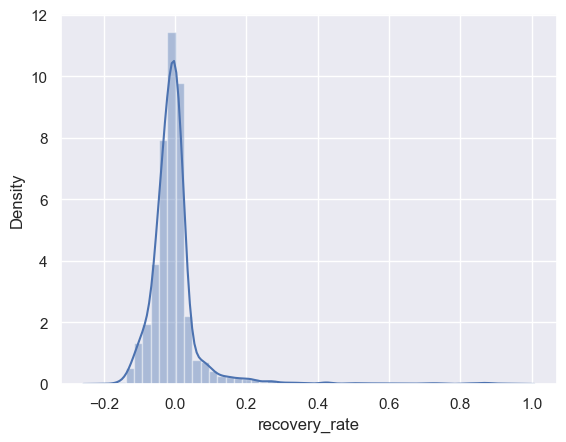

In [184]:
sns.distplot(lgd_targets_stage_2_test - y_hat_test_lgd_stage_2)


In [185]:
pickle.dump(reg_lgd_st_2, open('lgd_model_stage_2.sav', 'wb'))


# Combining Stage 1 and Stage 2

In [186]:
y_hat_test_lgd_stage_2_all = reg_lgd_st_2.predict(lgd_inputs_stage_1_test)

In [187]:
y_hat_test_lgd_stage_2_all

array([0.11946489, 0.09645001, 0.13381073, ..., 0.12076007, 0.11616414,
       0.15662217])

In [188]:
y_hat_test_lgd = y_hat_test_lgd_stage_1 * y_hat_test_lgd_stage_2_all


In [189]:
pd.DataFrame(y_hat_test_lgd).describe()


,0
count,8648.000000
mean,0.084212
std,0.051615
min,-0.008060
25%,0.050087
50%,0.099056
75%,0.122987
max,0.236752


In [190]:
y_hat_test_lgd = np.where(y_hat_test_lgd < 0, 0, y_hat_test_lgd)
y_hat_test_lgd = np.where(y_hat_test_lgd > 1, 1, y_hat_test_lgd)

In [191]:
pd.DataFrame(y_hat_test_lgd).describe()


,0
count,8648.000000
mean,0.084214
std,0.051612
min,0.000000
25%,0.050087
50%,0.099056
75%,0.122987
max,0.236752
